In [48]:
%matplotlib inline

#show account balance
import sys
# this is to be abel to use all the code in the voltrad1 project
sys.path.append("../")
import pandas as pd
import sqlite3
from volsetup.logger import logger
from volsetup import config
import operations.market_data as ddtt
globalconf = config.GlobalConfig()
log = logger("ipython")
db_type = "optchain_ib"
expiry = "2017-01"
db_file = ddtt.get_market_db_file(globalconf,db_type,expiry)
path = globalconf.config['paths']['data_folder']
store = sqlite3.connect(path + db_file)
symbol = "ES"
df1 = pd.read_sql_query("SELECT * FROM " + symbol, store)
df1.sort_values(by=['current_datetime'], inplace=True)

In [49]:
len(df1)

84574

In [50]:
df1.columns

Index(['index', 'CallOI', 'PutOI', 'Volume', 'askDelta', 'askGamma',
       'askImpliedVol', 'askOptPrice', 'askPrice', 'askPvDividend', 'askSize',
       'askTheta', 'askUndPrice', 'askVega', 'bidDelta', 'bidGamma',
       'bidImpliedVol', 'bidOptPrice', 'bidPrice', 'bidPvDividend', 'bidSize',
       'bidTheta', 'bidUndPrice', 'bidVega', 'closePrice', 'comboLegsDescrip',
       'currency', 'current_date', 'current_datetime', 'exchange', 'expiry',
       'highPrice', 'lastDelta', 'lastGamma', 'lastImpliedVol', 'lastOptPrice',
       'lastPrice', 'lastPvDividend', 'lastSize', 'lastTheta', 'lastUndPrice',
       'lastVega', 'lowPrice', 'modelDelta', 'modelGamma', 'modelImpliedVol',
       'modelOptPrice', 'modelPvDividend', 'modelTheta', 'modelUndPrice',
       'modelVega', 'multiplier', 'right', 'secType', 'strike', 'symbol'],
      dtype='object')

In [54]:
df2 = df1[(df1['right'] == "C") & (df1['strike'].astype(float) == 2300.0)].dropna(subset=['lastPrice'])

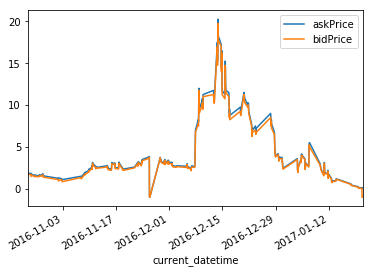

In [55]:

x_col = 'current_datetime'
y_cols = ['askPrice','bidPrice']
df2=df2.loc[:,[x_col] + y_cols].dropna()
df2.loc[:,y_cols] \
    = df2.loc[:,y_cols].apply(pd.to_numeric, errors='coerce')
df2.loc[:,x_col]=pd.to_datetime(df2.loc[:,x_col], format="%Y%m%d%H%M%S")
df2.index = df2[x_col]
del df2[x_col]
df2.plot()

In [56]:
df2

,askPrice,bidPrice
current_datetime,,
2016-10-24 21:52:07,1.85,1.75
2016-10-25 15:52:03,1.85,1.70
2016-10-25 16:52:05,1.60,1.50
2016-10-25 17:52:05,1.75,1.65
2016-10-25 18:52:07,1.80,1.65
2016-10-25 19:52:06,1.70,1.60
2016-10-25 20:52:07,1.70,1.60
2016-10-25 21:52:08,1.70,1.60
2016-10-26 16:52:05,1.60,1.45
